In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/RecHash

/content/drive/.shortcut-targets-by-id/1RbfabtwaBLjUw91iLjZ9z3eugQIdP4hb/RecHash


In [3]:
import numpy as np
import json
from evaluate import evaluate
from utility import *
import pandas as pd

# Evaluate

In [4]:
dataset = 'movielens'
setting = '2core'
pred_dir = "predictions/%s/" %(dataset)
input_dir = "dataset/%s/%s/" % (dataset, setting)
result_dir = 'results/%s/' % dataset

dat = 'ml' if dataset == 'movielens' else 'az'

# metapaths = ['UPUP', 'UPGP']

block_metapaths = ['Uh(U)_BU', 'UPh(P)_BU', 'UTh(T)_BU', 'UPTh(T)_BU', 'UPUh(U)_BU',  'UTPh(P)_BU']

In [ ]:
# All prediction files 

pred_files = ["userknn_ml_2core_nb10.json", 
              "bpr_none_1_ml_emb300_2core.json",
              "vbpr_none_1_ml_emb300_2core.json"] + \
             ["vkg_ml_%s_nw100_nb10_emb300_2core.json"%(m) for m in metapaths]+\
             ["RN_user_based_bm%s_ml_UserItemMatrix_nw100_nb10_emb300_2core.json"%bm for bm in nh_metapaths] +\
             ["RH_user_based_bm%s_ml_UserItemMatrix_nw100_nb10_emb300_2core.json"%bm for bm in block_metapaths] +\
             ["SRH_user_based_bm%s_ml_UserItemMatrix_nw100_nb10_emb300_2core.json"%bm for bm in rw_metapaths] +\
             ["ME_user_based_bm%s_ml_%s_nw100_nb10_emb300_2core.json"%(bm,m) for bm in block_metapaths for m in metapaths]   


In [ ]:
pred_files

['RH_user_based_bmUh(U)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUPh(P)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUTh(T)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUPTh(T)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUPUh(U)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUTPh(P)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UP_0.6sample_10epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json']

In [ ]:
rw_metapaths = [ 'RW_UP_0.6sample_10epo_6bit_1r_BU',
                
]
block_metapaths = ['Uh(U)_BU', 'UPh(P)_BU', 'UTh(T)_BU', 'UPTh(T)_BU', 'UPUh(U)_BU',
                   'UTPh(P)_BU'
]


pred_files =  ["userknn_ml_2core_nb10.json", ] + \
            ["RH_user_based_bm%s_ml_UserItemMatrix_nw100_nb10_emb300_2core.json"%bm for bm in block_metapaths] +\
             ["SRH_user_based_bm%s_ml_UserItemMatrix_nw100_nb10_emb300_2core.json"%bm for bm in rw_metapaths]

In [ ]:
labels = ["CF"] + \
             ['RH %s'%bm for bm in block_metapaths] +\
             ['SRH %s'%bm for bm in rw_metapaths]

In [ ]:
labels

['CF',
 'RH Uh(U)_BU',
 'RH UPh(P)_BU',
 'RH UTh(T)_BU',
 'RH UPTh(T)_BU',
 'RH UPUh(U)_BU',
 'RH UTPh(P)_BU',
 'SRH RW_UP_0.6sample_10epo_6bit_1r_BU']

In [6]:
# All new results for MovieLens
pred_files = [
 'userknn_ml_2core_nb10.json',
 'RH_user_based_ml_bmRH_UPT_16bit_1r_BU_nb10.json',
 'RH_user_based_ml_bmRH_UPU_16bit_1r_BU_nb10.json',
 'RH_user_based_bmUh(U)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUPh(P)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUTh(T)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUPTh(T)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUPUh(U)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_bmUTPh(P)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'RH_user_based_ml_bmRW_UP_0.6sample_10epo_6bit_1r_BU_nb10.json',
 'RH_user_based_ml_bmIMG_sift_UPh(P)_6bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_dctblock-3level_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_orb_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_block-UPh(P)_6bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_block-5level_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_block-dual5level_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_block-Tri5level_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_dctblock-5level_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_dctblock-5level_UPh(P)_6bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_dctblock_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_block_UPh(P)_16bit_combinedBU_nb10.json',
 'RH_user_based_ml_bmIMG_block_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_CNNfeat_UPh(P)_16bit_BU_nb10.json',
 'RH_user_based_ml_bmIMG_UPh(P)_minHash_6bit_BP_nb10.json',
  
 'SRH_user_based_bmRW_UP_0.6sample_5epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UP_0.6sample_10epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPU_0.6sample_5epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPU_0.6sample_10epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPU_0.6sample_10epo_16bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPT_0.6sample_5epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPT_0.6sample_5epo_16bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPT_0.6sample_10epo_16bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPUP_0.6sample_5epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPUP_0.6sample_3epo_16bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPTP_0.6sample_10epo_16bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPTP_0.6sample_5epo_16bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPUT_0.6sample_3epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPTU_0.6sample_5epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPTU_0.6sample_10epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPTU_0.6sample_5epo_8bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPTP_0.6sample_10epo_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',
 'SRH_user_based_bmRW_UPTP_0.6sample_5epo_8bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.json',

]

labels = [
 'CF',
 'RH UPT',
 'RH UPU',
 'RH Uh(U)',
 'RH UPh(P)',
 'RH UTh(T)',
 'RH UPTh(T)',
 'RH UPUh(U)',
 'RH UTPh(P)',
 'RH UP old',
 'RH UPh(P)_img_sift',
 'RH UPh(P)_img_dctlv3',
 'RH UPh(P)_img_orb',
 'RH UPh(P)_img_block_6bit',
 'RH UPh(P)_img_blocklv5',
 'RH UPh(P)_img_dualblocklv5',
 'RH UPh(P)_img_Triblocklv5',
 'RH UPh(P)_img_dctblocklv5',
 'RH UPh(P)_img_dctblocklv5_6bit',
 'RH UPh(P)_img_dctblock',
 'RH UPh(P)_img_dblock_combined',
 'RH UPh(P)_img_block_16bit',
 'RH UPh(P)_img_cnn',
 'RH UPh(P)_img_minHash',

 'SRH UP_6bit_5e',
 'SRH UP_6bit_10e',
 'SRH UPU_6bit_5e',
 'SRH UPU_6bit_10e',
 'SRH UPU_16bit_10e',
 'SRH UPT_6bit_5e',
 'SRH UPT_16bit_5e',
 'SRH UPT_16bit_10e',
 'SRH UPUP_6bit_5e',
 'SRH UPUP_16bit_3e',
 'SRH UPTP_16bit_10e',
 'SRH UPTP_16bit_5e',
 'SRH UPUT_6bit_3e',
 'SRH UPTU_6bit_5e',
 'SRH UPTU_6bit_10e',
 'SRH UPTU_8bit_5e',
 'SRH UPTP_6bit_10e',
 'SRH UPTP_8bit_5e',

]

In [12]:
df_res


,labels,pred
0,CF,userknn_ml_2core_nb10.json
1,RH UPT,RH_user_based_ml_bmRH_UPT_16bit_1r_BU_nb10.json
2,RH UPU,RH_user_based_ml_bmRH_UPU_16bit_1r_BU_nb10.json
3,RH Uh(U),RH_user_based_bmUh(U)_BU_ml_UserItemMatrix_nw1...
4,RH UPh(P),RH_user_based_bmUPh(P)_BU_ml_UserItemMatrix_nw...
5,RH UTh(T),RH_user_based_bmUTh(T)_BU_ml_UserItemMatrix_nw...
6,RH UPTh(T),RH_user_based_bmUPTh(T)_BU_ml_UserItemMatrix_n...
7,RH UPUh(U),RH_user_based_bmUPUh(U)_BU_ml_UserItemMatrix_n...
8,RH UTPh(P),RH_user_based_bmUTPh(P)_BU_ml_UserItemMatrix_n...
9,RH UP old,RH_user_based_ml_bmRW_UP_0.6sample_10epo_6bit_...


In [7]:
len(pred_files),len(labels)

(42, 42)

In [ ]:
# # According labels for each prediction file

# labels = ["CF", 'BPR', 'VBPR'] + \
#              ['ME %s'%(m) for m in metapaths]  +\
#              ['RN %s'%bm for bm in nh_metapaths] +\
#              ['RH %s'%bm for bm in block_metapaths] +\
#              ['SRH %s'%bm for bm in rw_metapaths] +\
#              ['ME %s %s'%(bm,m) for bm in block_metapaths for m in metapaths] 

In [ ]:
with open(input_dir + "train.json", 'r') as fp:
    train_set = json.load(fp)
with open(input_dir + "test.json", 'r') as fp:
    test_set = json.load(fp)
with open(input_dir + "item.json", 'r') as fp:
    item_data = json.load(fp)
all_users = list(train_set.keys())
all_items = list(item_data.keys())

In [ ]:
import os
df = None
try:
    os.mkdir(result_dir + "%s/"%th)
except:
    pass
    
assert len(pred_files) == len(labels)
    
for label, pred_file in zip(labels, pred_files): 
        
    result_file = result_dir + pred_file.replace('.json', '.csv') 
        
    if os.path.exists(result_file):
        print("file exists: ",end='')
    else:
        print("make new file: ",end='')
        prediction = json.load(open(pred_dir + pred_file, 'r'))   
        print(len(prediction))
            
        fres = open(result_file, 'w')
        write_header(fres, dataset)    
        evaluate(prediction, dataset, input_dir, all_users, all_items, fres, 'user-item', rank_weights_prec=True, rank_weights_rec=False)
        fres.close()

    print(result_file)
    result = pd.read_csv(result_file, sep='\t')
    result['label'] = label
        
    if df is None:
        df = result
    else:
        df = pd.concat([df, result])
            
df = df.reindex(columns=(['label'] + list([a for a in df.columns if a != 'label']) ))

# df.to_csv(result_dir + '%s_baselines_eval_hash.csv'%(dat), index=False)
df.to_csv(result_dir + '%s_eval_hash_selected.csv'%(dat), index=False)


make new file: 576


/content/drive/.shortcut-targets-by-id/1RbfabtwaBLjUw91iLjZ9z3eugQIdP4hb/RecHash/evaluate.py:111: RuntimeWarning: invalid value encountered in true_divide
  avg_f1 = 2 * (np.array(avg_pre) * np.array(avg_rec)) / (np.array(avg_pre) + np.array(avg_rec))
/content/drive/.shortcut-targets-by-id/1RbfabtwaBLjUw91iLjZ9z3eugQIdP4hb/RecHash/evaluate.py:112: RuntimeWarning: invalid value encountered in true_divide
  norm_f1 = 2 * (np.array(norm_pre) * np.array(norm_rec)) / (np.array(norm_pre) + np.array(norm_rec))


results/movielens/userknn_ml_2core_nb10.csv
file exists: results/movielens/RH_user_based_ml_bmRH_UPT_16bit_1r_BU_nb10.csv
file exists: results/movielens/RH_user_based_ml_bmRH_UPU_16bit_1r_BU_nb10.csv
file exists: results/movielens/RH_user_based_bmUh(U)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: results/movielens/RH_user_based_bmUPh(P)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: results/movielens/RH_user_based_bmUTh(T)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: results/movielens/RH_user_based_bmUPTh(T)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: results/movielens/RH_user_based_bmUPUh(U)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: results/movielens/RH_user_based_bmUTPh(P)_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: results/movielens/RH_user_based_ml_bmRW_UP_0.6sample_10epo_6bit_1r_BU_nb10.csv
file exists: results/movielens/RH_user_based_ml_bmIMG_sift_UPh(P)_6bit_BU_nb10.csv
file 

# Plot the results

In [18]:
# filename of all results combined and ready to be plotted 

# df_result_filename = result_dir +  'ml_selected_RH.csv'
df_result_filename = result_dir +  'ml_eval_hash_new.csv'

df = pd.read_csv(df_result_filename)

In [29]:
df[df.group=='all'].iloc[:,:18].sort_values('avg_prec_1',ascending=False)

,label,vtype,group,avg_prec_1,avg_prec_5,avg_prec_10,avg_prec_50,avg_prec_100,avg_rec_1,avg_rec_5,avg_rec_10,avg_rec_50,avg_rec_100,avg_f1_1,avg_f1_5,avg_f1_10,avg_f1_50,avg_f1_100
125,RH UPh(P)_img_dblock_combined,user-item,all,0.050347,0.020162,0.012421,0.003819,0.002298,0.010910,0.016987,0.019264,0.022934,0.023899,0.017933,0.018439,0.015103,0.006548,0.004193
251,SRH UPTP_8bit_5e,user-item,all,0.048611,0.019323,0.012152,0.003798,0.002268,0.010823,0.016104,0.018971,0.022790,0.023640,0.017704,0.017567,0.014815,0.006511,0.004139
83,RH UPh(P)_img_block_6bit,user-item,all,0.048611,0.021701,0.013296,0.003998,0.002384,0.009924,0.019478,0.021934,0.025365,0.026331,0.016483,0.020530,0.016556,0.006908,0.004372
215,SRH UPTP_16bit_5e,user-item,all,0.048611,0.019780,0.012303,0.003824,0.002279,0.010823,0.016401,0.019186,0.022728,0.023575,0.017704,0.017933,0.014993,0.006546,0.004156
221,SRH UPUT_6bit_3e,user-item,all,0.048611,0.020046,0.012372,0.003837,0.002286,0.011624,0.017469,0.020298,0.023965,0.024744,0.018762,0.018669,0.015374,0.006615,0.004185
203,SRH UPUP_16bit_3e,user-item,all,0.048611,0.019514,0.012199,0.003814,0.002274,0.010823,0.016548,0.019351,0.023119,0.023923,0.017704,0.017909,0.014964,0.006548,0.004153
197,SRH UPUP_6bit_5e,user-item,all,0.048611,0.019682,0.012226,0.003802,0.002271,0.010823,0.016330,0.019238,0.022858,0.023682,0.017704,0.017850,0.014951,0.006519,0.004145
245,SRH UPTP_6bit_10e,user-item,all,0.048611,0.019664,0.012387,0.003824,0.002280,0.010823,0.016414,0.019885,0.023302,0.024179,0.017704,0.017893,0.015265,0.006570,0.004168
29,RH UPh(P),user-item,all,0.046875,0.020880,0.012496,0.003836,0.002306,0.008153,0.016687,0.019277,0.022513,0.023468,0.013890,0.018550,0.015163,0.006555,0.004200
209,SRH UPTP_16bit_10e,user-item,all,0.046875,0.019253,0.012103,0.003787,0.002262,0.010721,0.016436,0.019163,0.022848,0.023688,0.017450,0.017733,0.014836,0.006497,0.004129


In [83]:
df_res_selected = df[df.group=='all'].iloc[[0,1,2,3,4,5,6,7,8,20,36,27, 32, 30, 24],:]
df_res_selected

,label,vtype,group,avg_prec_1,avg_prec_5,avg_prec_10,avg_prec_50,avg_prec_100,avg_rec_1,avg_rec_5,...,norm_ep_5,norm_ep_10,norm_ep_50,norm_ep_100,norm_er_1,norm_er_5,norm_er_10,norm_er_50,norm_er_100,Unnamed: 82
5,CF,user-item,all,0.010417,0.004740,0.003118,0.000894,0.000466,0.000278,0.001100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,RH UPT,user-item,all,0.043403,0.018987,0.011819,0.003702,0.002227,0.006941,0.014386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,RH UPU,user-item,all,0.034722,0.018021,0.011410,0.003621,0.002184,0.005842,0.013965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,RH Uh(U),user-item,all,0.013889,0.009300,0.005756,0.001819,0.001072,0.001972,0.007227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,RH UPh(P),user-item,all,0.046875,0.020880,0.012496,0.003836,0.002306,0.008153,0.016687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,RH UTh(T),user-item,all,0.039931,0.016968,0.011122,0.003402,0.002009,0.008339,0.016671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,RH UPTh(T),user-item,all,0.045139,0.020712,0.012468,0.003848,0.002315,0.008587,0.017658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,RH UPUh(U),user-item,all,0.045139,0.020596,0.012466,0.003837,0.002304,0.007806,0.017304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,RH UTPh(P),user-item,all,0.036458,0.016181,0.010485,0.003339,0.002014,0.010166,0.017545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,RH UPh(P)_img_dblock_combined,user-item,all,0.050347,0.020162,0.012421,0.003819,0.002298,0.010910,0.016987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap
import numpy as np
import itertools
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

N = [1,5,10,50,100]
precol = ['avg_prec_%d'%n for n in N]
reccol = ['norm_rec_%d'%n for n in N]
f1col = ['norm_f1_%d'%n for n in N]
# epcol = ['norm_ep_%d'%n for n in N]
# ercol = ['norm_er_%d'%n for n in N]
# genre_cov= ['genre_cov_%d'%n for n in N]
# nov = ['novelty_%d'%n for n in N]
linewidth = 3
markersize =9

if dataset == 'movielens' :
    #ranges = ['2to10', '10to20', '20to50', '50to100', '100to1276', 'all']
    ranges = [ 'all']
else:
    ranges = [ 'all']

def plot(result, group, path):
    
    global N, precol, reccol, f1col #, epcol, ercol
    figsize = (30,25)
    #figsize = (13,5)
    
    marker, linestyle, color = get_style()    
    fig = plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    x = N
    plt.xscale('symlog')
    for row in result.itertuples():
        y = result.loc[result['label']==row.label][precol].values[0]
        label = row.label
        label = label.replace("_BU", '')        
        
        # if " RW_UPT_" in label:
        #     label = label.replace("RW_UPT_", "$\mathcal{M}_1$")
        # elif " RW_UPU_" in label:
        #     label = label.replace("RW_UPU_", "$\mathcal{M}_{2}$")       
            
        # elif " RH_UPT_" in label:
        #     label = label.replace("RH_UPT_", "$\mathcal{M}_1$")
        # elif " RH_UPU_" in label:
        #     label = label.replace("RH_UPU_", "$\mathcal{M}_{2}$")
               
        # elif " UPTh(T)" in label:
        #     label = label.replace("UPTh(T)", "$\mathcal{M}_{3}$")
        # elif " UPUh(U)" in label:
        #     label = label.replace("UPUh(U)", "$\mathcal{M}_{4}$")
        
        label = label.replace(' ', '_')
        ax.plot(x, y,label=label, marker = next(marker), linestyle=next(linestyle), color=next(color), linewidth=linewidth, markersize=markersize)
    plt.xlabel('N')
    plt.ylabel('MAP@N')
    plt.title('MAP@N')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
    #fig = plt.figure(figsize=(3,2))
    marker, linestyle, color = get_style()
    ax = plt.subplot(1,2,2)
    x = N
    plt.xscale('symlog')
    for row in result.itertuples():
        y = result.loc[result['label']==row.label][reccol].values[0]
        label = row.label
        label = label.replace("_BU", '')        
        
        # if " RW_UPT_" in label:
        #     label = label.replace("RW_UPT_", "$\mathcal{M}_1$")
        # elif " RW_UPU_" in label:
        #     label = label.replace("RW_UPU_", "$\mathcal{M}_{2}$")       
            
        # elif " RH_UPT_" in label:
        #     label = label.replace("RH_UPT_", "$\mathcal{M}_1$")
        # elif " RH_UPU_" in label:
        #     label = label.replace("RH_UPU_", "$\mathcal{M}_{2}$")
               
        # elif " UPTh(T)" in label:
        #     label = label.replace("UPTh(T)", "$\mathcal{M}_{3}$")
        # elif " UPUh(U)" in label:
        #     label = label.replace("UPUh(U)", "$\mathcal{M}_{4}$")
        label = label.replace(' ', '_')
        
        ax.plot(x, y,label=label, marker = next(marker), linestyle=next(linestyle), color=next(color), linewidth=linewidth, markersize=markersize)
    plt.xlabel('N')
    plt.ylabel('Recall@N')
    plt.title('Recall@N')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
    plt.tight_layout(pad=0.5)
    plt.savefig(path.replace('.csv', '_acc_%s.png'%group), bbox_inches='tight', dpi=250)
    plt.show()

In [81]:
def plotF1(result, path):
    
    global N, precol, reccol, f1col #, epcol, ercol
    # figsize = (30,10)
    figsize = (8,10)
    
    marker, linestyle, color = get_style()    
    fig = plt.figure(figsize=figsize)
    x = N
    plt.xscale('symlog')
    for row in result.itertuples():
        y = result.loc[result['label']==row.label][precol].values[0]
        label = row.label
        label = label.replace("_BU", '')        

        label = label.replace(' ', '_')
        plt.plot(x, y,label=label, marker = next(marker), linestyle=next(linestyle), color=next(color), linewidth=linewidth, markersize=markersize)
    plt.xlabel('N')
    plt.ylabel('F1@N')
    plt.title('F1@N')
    plt.legend()
    
    plt.tight_layout(pad=0.5)
    plt.savefig(path.replace('.csv', '_f1_all.png'), bbox_inches='tight', dpi=250)
    plt.show()

In [70]:
path = df_result_filename

path.replace('.csv', '_acc_all.png')


'results/movielens/ml_eval_hash_new_acc_all.png'

In [63]:
def get_style():
    markerset = itertools.cycle(('+', 'x', '^', '*', 'o', 's', 'd', 'p', '<', '>')) 
    lineset = itertools.cycle(('-', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':',))
    colorset = itertools.cycle(( 'r', 'g', 'b', 'k', 'm', 'c', 'peru', 'purple', 'olive', 'dimgray', 'orange', 'lightgreen', 'pink', 'navy'))
    return markerset, lineset, colorset

<ipython-input-15-2adb67f619c1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['label'] = df['label'].str.replace('0.6sample_5epo_16bit_1r', '')


ml_baselines_eval.csv


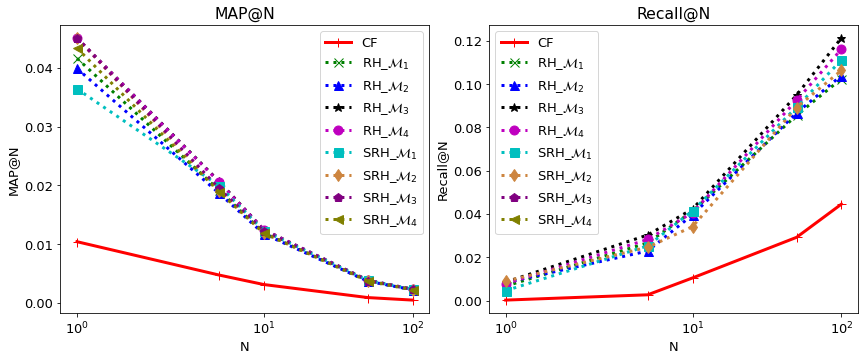

In [ ]:

df['label'] = df['label'].str.replace('0.6sample_5epo_16bit_1r', '')
df['label'] = df['label'].str.replace('RN', 'RH')
df['label'] = df['label'].str.replace('16bit_1r', '')
df['label'] = df['label'].str.replace('8bit_1r', '')
df['label'] = df['label'].str.replace('6bit_1r', '')
df['label'] = df['label'].str.replace('RH_UPTU', 'RH_UPUT')
df['label'] = df['label'].str.replace('RW_UPTU', 'RW_UPUT')

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    

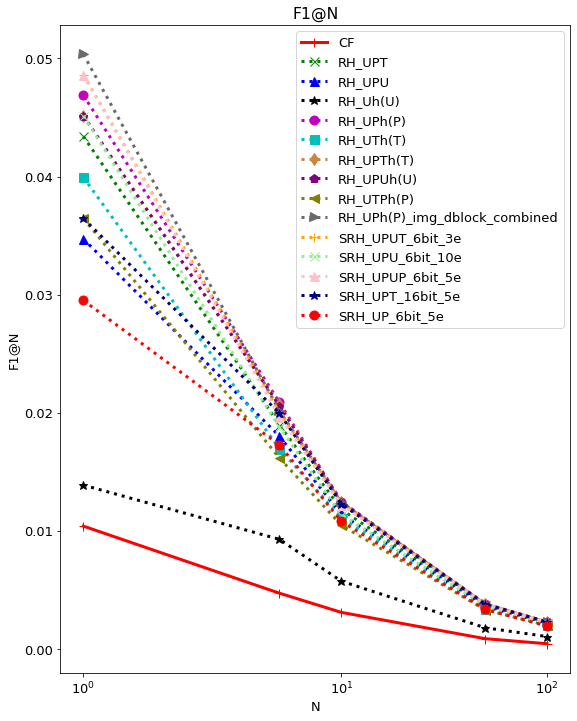

In [85]:
plotF1(df_res_selected, df_result_filename)   

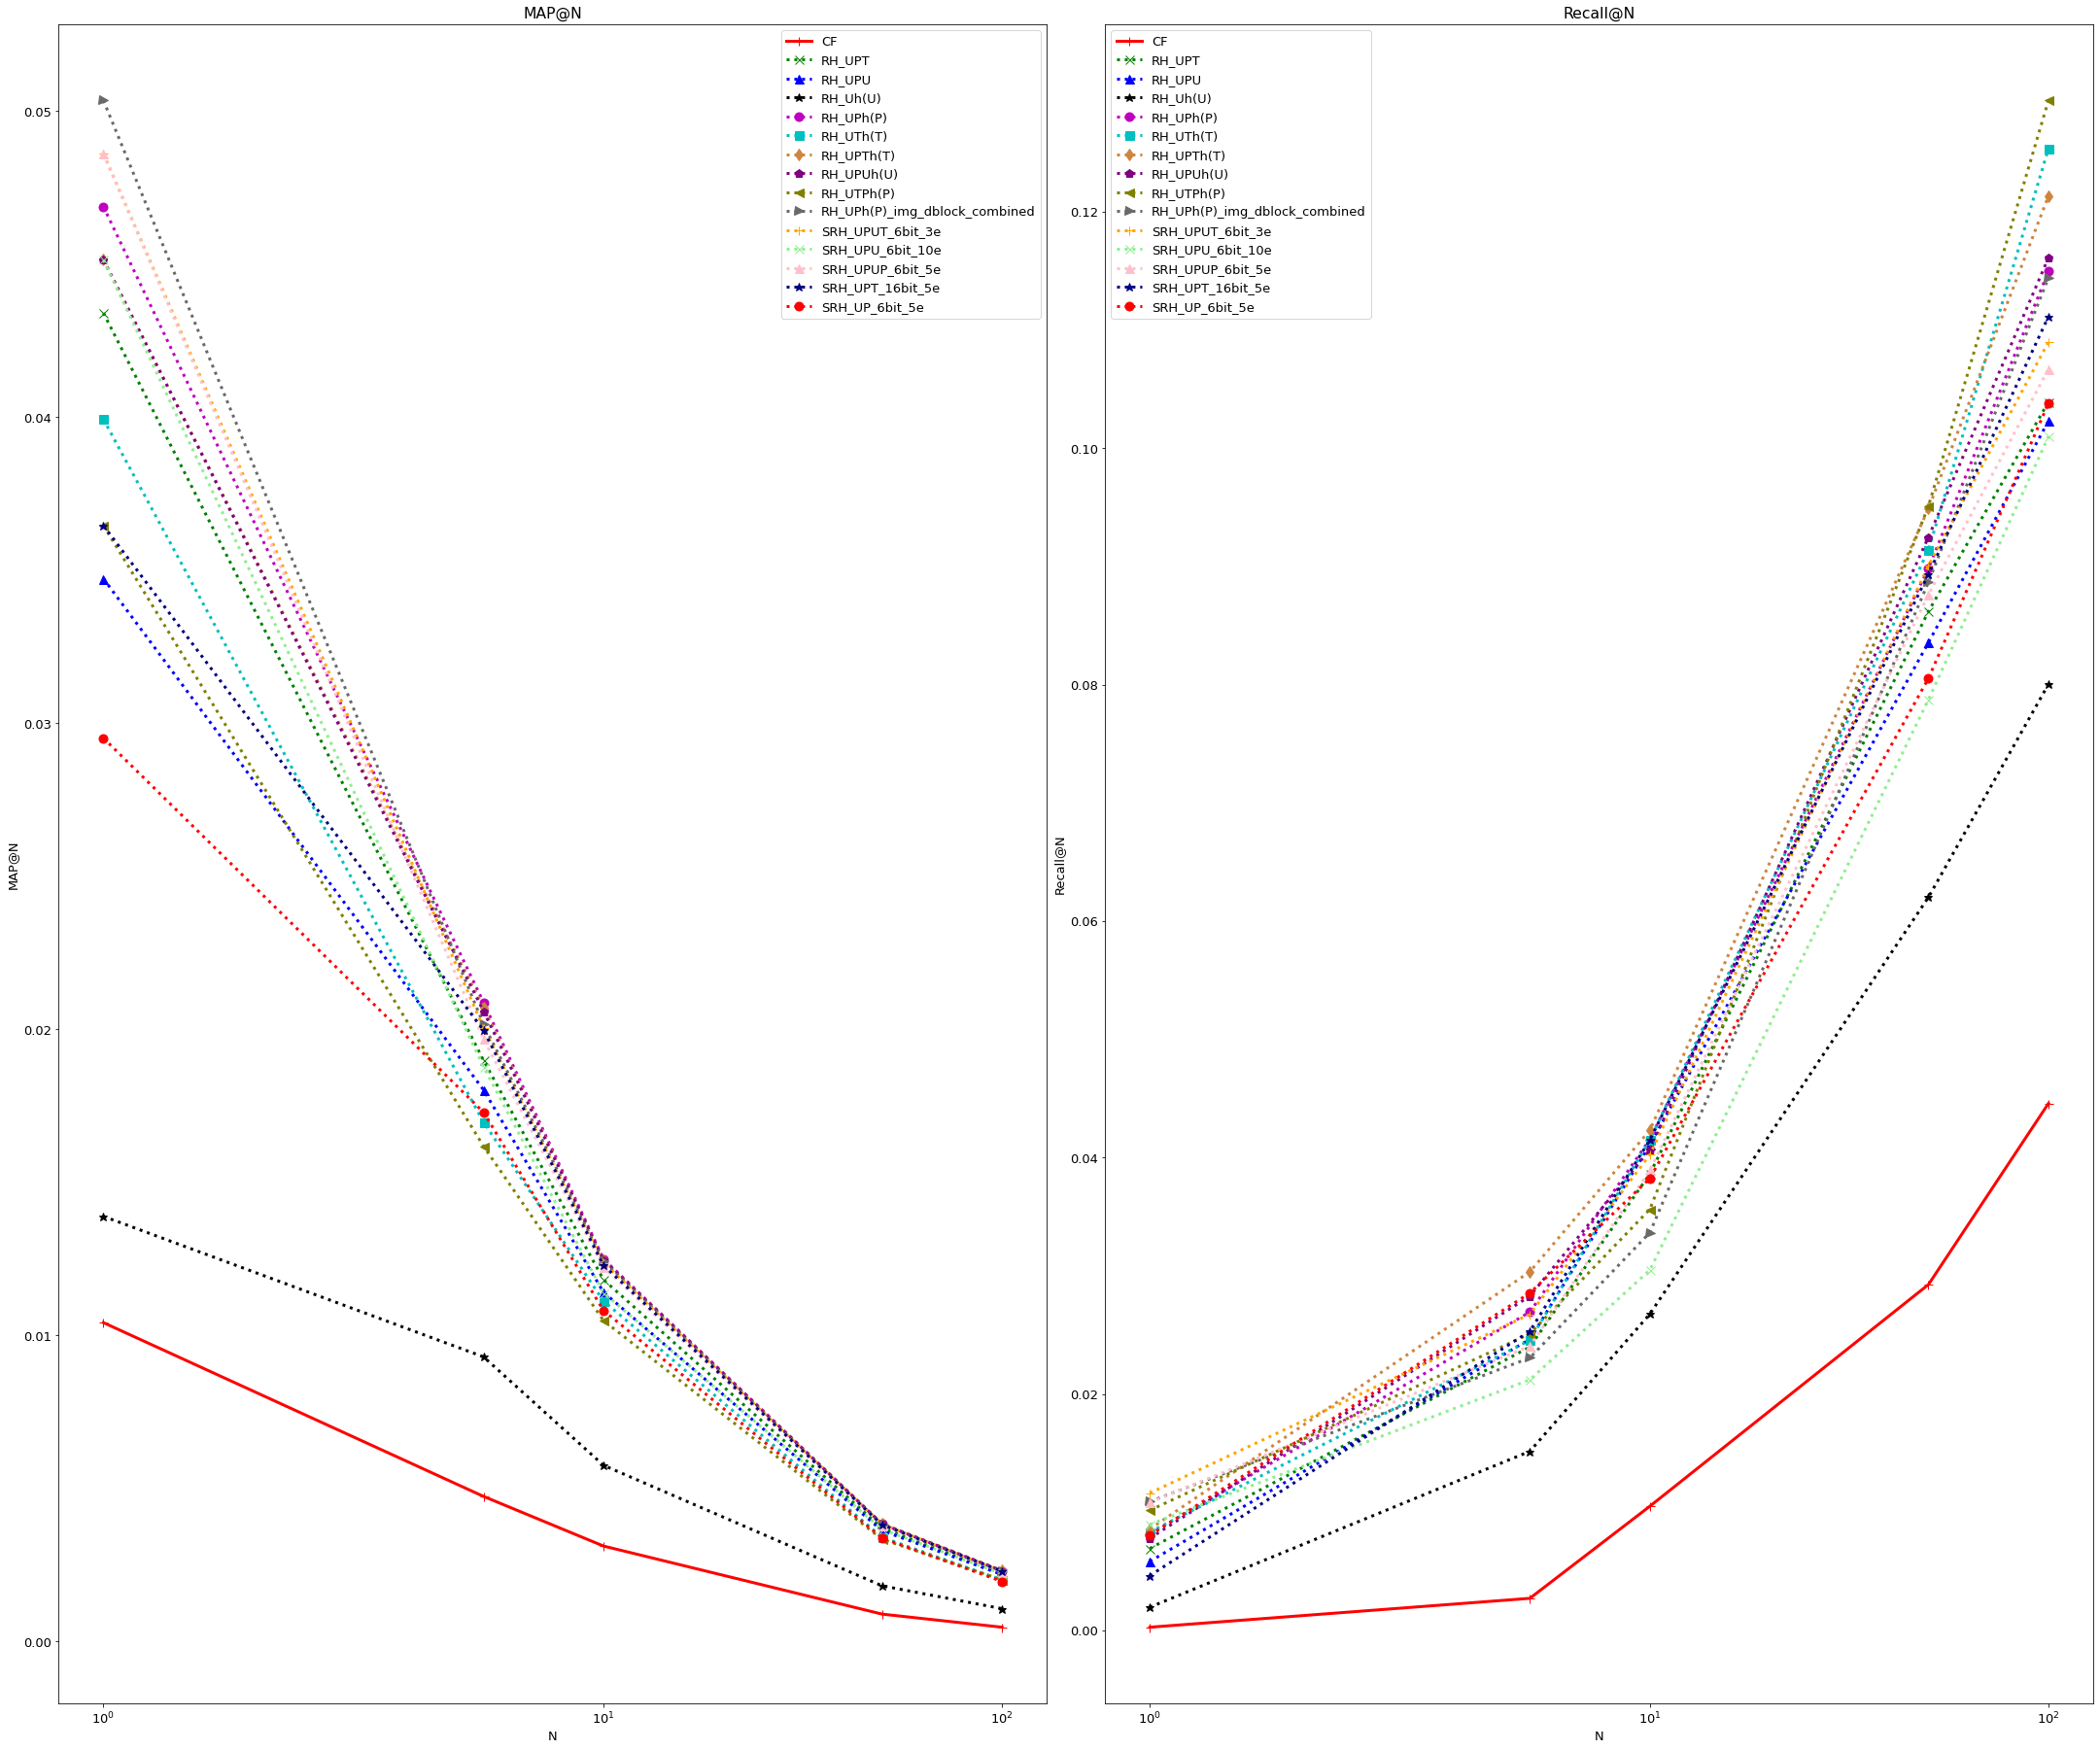

In [84]:
for r in ranges:
    plot(df_res_selected[df_res_selected['group'] == r], r, df_result_filename)   

ml_baselines_eval.csv


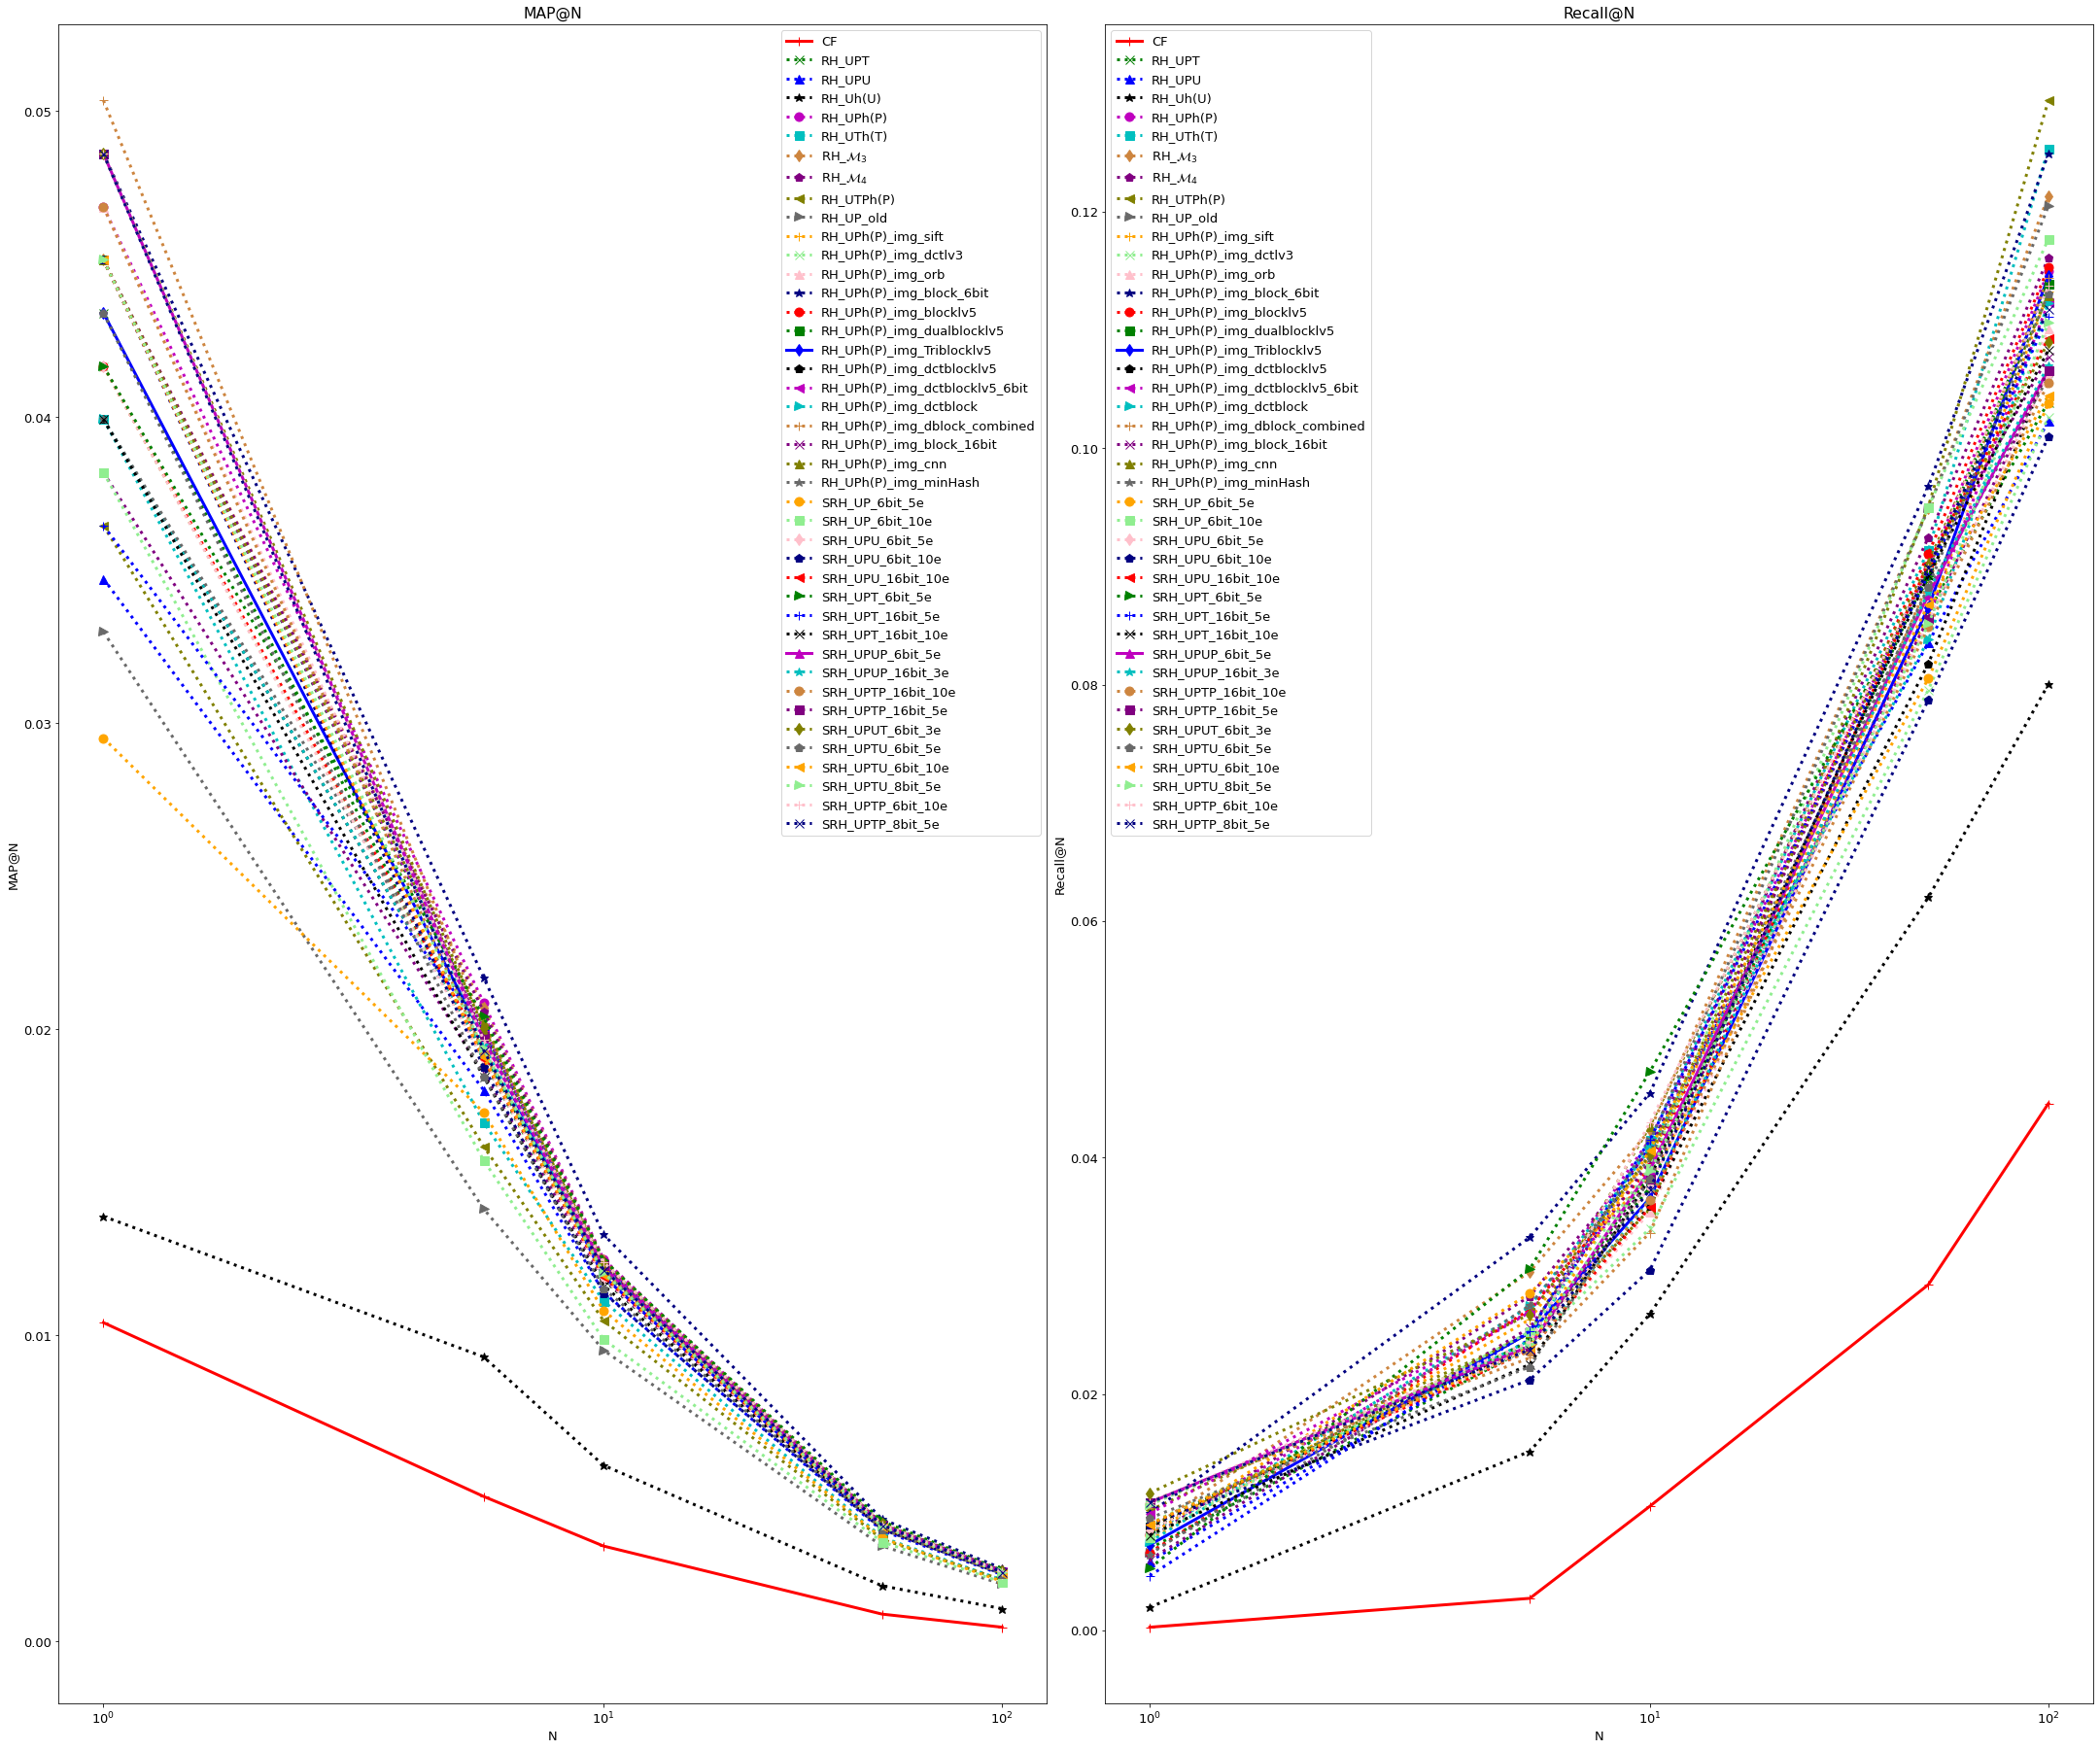

In [ ]:
df_result_filename = result_dir +  'ml_eval_hash_new.csv'

df = pd.read_csv(df_result_filename)

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    